## Project description:

In this project I will be exploring the dataset by analyzing and visualizing it, I will also make sure it is in the right format before I could build a machine learning model. There will be comments to explain the technical parts of the project to make it easy for my readers to follow.

All of this will be followed by an **executive summary** on how my model affects my company on the classification and misclassification of my model. 

## Importing libraries



In [117]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib.colors import ListedColormap

# # to automate the NLP extraction...
# from sklearn.feature_extraction.text import CountVectorizer




# # main ones to focus on for this sprint
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

# from sklearn.naive_bayes import GaussianNB


# # Covered in sprint 3
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# # Covered in sprint 4
# from sklearn.gaussian_process import GaussianProcessClassifier




In [118]:
#data analysis libraries and 
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cross_val_score is the new class for today...
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification


# Neural Network!!
from sklearn.neural_network import MLPClassifier
#Machine learning packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [119]:
#We are going to start by loading the data to see the structure
data = pd.read_csv('assessment_data.csv')
data.head()

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,bigollo-16,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,cantor-33,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,cantor-33,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,cantor-33,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,cantor-33,blue,25.0000,1,sigma,204.415716


## Exploratory Data Analysis

In [120]:
#We have 1309 rows and 10 features
data.shape

(1309, 10)

In [121]:
#View the statistical summary of the dataset
data.describe(include='all')

,target_var,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
count,1309.000000,1308.000000,1309.000000,1309.000000,295,1309,1046.000000,1309.000000,1307,1309.000000
unique,NaN,NaN,NaN,NaN,181,2,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,fermat,pink,NaN,NaN,sigma,NaN
freq,NaN,NaN,NaN,NaN,8,843,NaN,NaN,914,NaN
mean,0.381971,33.295479,0.385027,0.498854,NaN,NaN,29.881135,2.294882,NaN,101.794120
std,0.486055,51.758668,0.865560,1.041658,NaN,NaN,14.413500,0.837836,NaN,50.890853
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.166700,1.000000,NaN,-93.974333
25%,0.000000,7.895800,0.000000,0.000000,NaN,NaN,21.000000,2.000000,NaN,68.550768
50%,0.000000,14.454200,0.000000,0.000000,NaN,NaN,28.000000,3.000000,NaN,102.039185
75%,1.000000,31.275000,0.000000,1.000000,NaN,NaN,39.000000,3.000000,NaN,135.175053


 - In total there are 1309 observations
 - We can see that feature 4 has about 77%(295 out of 1309) of missing data, so there is no much we can extract from this column, meaning we might have to drop it.
 - We can see that feature 6 is missing around 20% of data, it is not much, and since because it is numerical, we can find a way to impute missing values. We will explore this later.
 

"' Every yellow point stands for a true point, which is a null, it seems like we are missing lots of feature 4 values, partially feature 6 and very little of feature 8 values with feature 4 missing a lot of values and 1 row of feature 8.  \nfeature 6 does not have much of the missing values, so we will impute the missing values using the average of feature 6 values. "

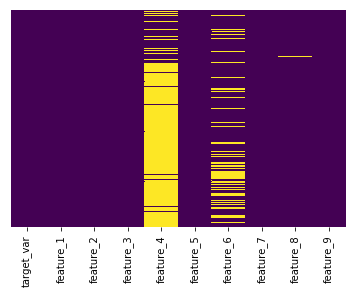

In [122]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
'''' Every yellow point stands for a true point, which is a null, it seems like we are missing lots of feature 4 values, partially feature 6 and very little of feature 8 values with feature 4 missing a lot of values and 1 row of feature 8.  
feature 6 does not have much of the missing values, so we will impute the missing values using the average of feature 6 values. '''

Every yellow point stands for a true point, which is a null, it seems like we are missing lots of feature 4 values, partially feature 6 and very little of feature 8 values. Feature 6 does not have much of the missing values, so we will impute the missing values using the averages.

Text(0.5,1,'target_var')

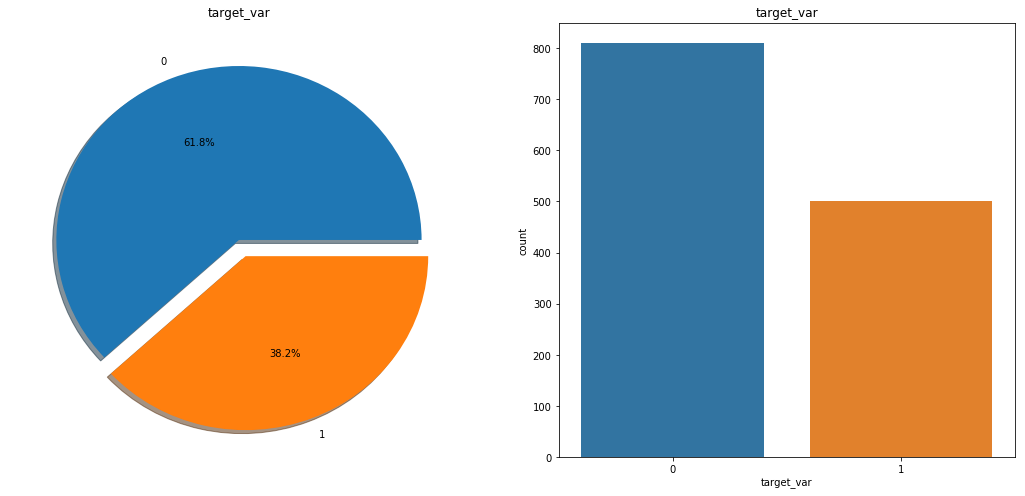

In [123]:
#We are checking the districution of the target class to investigate class imbalancing

f,ax=plt.subplots(1,2,figsize=(18,8))
data['target_var'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target_var')
ax[0].set_ylabel('')
sns.countplot('target_var',data=data,ax=ax[1])
ax[1].set_title('target_var')

The data is clearly imbalanced, we will see how we are going to work with this under the modeling section of our project.

In [124]:
#Checking how many categorical features of the dataset we have in feature_5 column
data['feature_5'].unique()

array(['blue', 'pink'], dtype=object)

In [125]:
#Checking the number of unique values there are in feature 4
data['feature_4'].nunique()

181

In [126]:
#Checking how many categorical features of the dataset we have in feature_8 column
data['feature_8'].unique()

array(['sigma', 'gamma', nan, 'qoph'], dtype=object)

In [127]:
#Since feature_4 has many nulls, we decided to drop it here.
data.drop('feature_4',axis=1,inplace=True)

---

Checking the averages of the unique values in feature 6

In [128]:
#Checking the avergaes
data[data['feature_8']=='sigma']['feature_6'].mean()

29.245204603580564

In [129]:
data[data['feature_8']=='gamma']['feature_6'].mean()

32.332154245283014

In [130]:
data[data['feature_8']=='qoph']['feature_6'].mean()

28.63

This function just replaces nulls with averages imputes the avergaes, using feature 8 column to impute correctly the values of each category

In [131]:
def impute_feature_6(see):
    feature_6 = see[0]
    feature_8 = see[1]
    
    if( pd.isnull(feature_6)):
        
        
        if feature_8 == 'sigma':
            return 29
        elif feature_8 == 'gamma':
            return 32
        else:
            return 28
    else:
        return feature_6
            
    

In [132]:
data['feature_6'] = data[['feature_6','feature_8']].apply(impute_feature_6,axis=1)

#### Correlation between features

We are investingating if there are two features which are highly correlated, to see if we can eliminate one of them because it is not advisable to use two features which are highly correlated. Removing one, would boost our model performance and increases the runtime. 

From the heatmap below it seems like we do not have highly correlated features except for the features which correlates with themselves. So we will proceed with all features

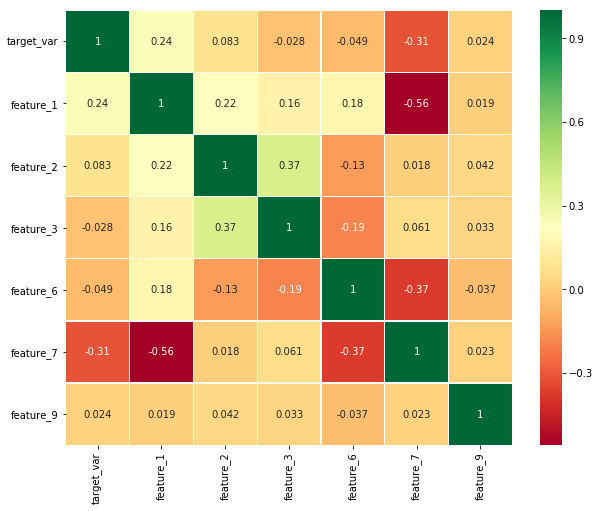

In [133]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

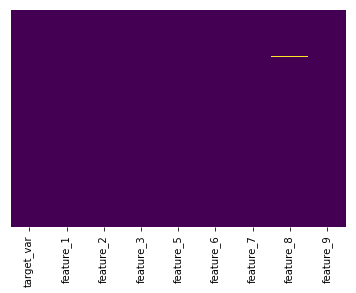

In [134]:
#Checking remaining null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [135]:
data.dropna(inplace=True)

In [136]:
#Note feature 4 has been dropped due to high number of null values
data.head()

,target_var,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,blue,25.0000,1,sigma,204.415716


In [137]:
#We are checking the dataset after preprocessing our data so far
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
target_var    1306 non-null int64
feature_1     1306 non-null float64
feature_2     1306 non-null int64
feature_3     1306 non-null int64
feature_5     1306 non-null object
feature_6     1306 non-null float64
feature_7     1306 non-null int64
feature_8     1306 non-null object
feature_9     1306 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 91.8+ KB


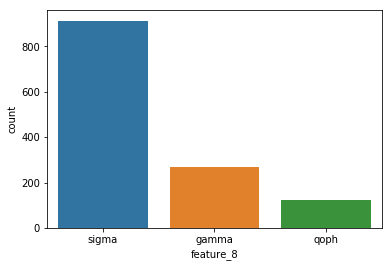

In [138]:
#Checking the distribution of feature 8, it is obvious to note we have more occurences of sigma values
sns.countplot(x='feature_8', data=data)

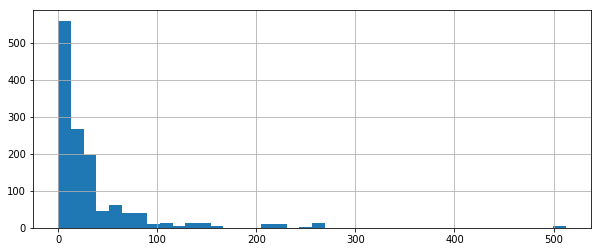

In [139]:
#We are checking how feature 1 is distributed, we can note that the less values occue mostly in our dataset.
data['feature_1'].hist(bins=40,figsize=(10,4))
#axis

In [140]:
#data.plot(figsize=(10, 7))
#plt.figure(figsize(10,7))
   #sns.boxplot(x='feature_8', y='feature_1',data=data)

#df = pd.DataFrame(np.random.randn(10,4),
#columns=['Col1', 'Col2', 'Col3', 'Col4'])
#boxplot = data.boxplot(['feature_1'])

In [141]:
data.head()

,target_var,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,211.3375,0,0,blue,29.0000,1,sigma,112.877941
1,1,151.5500,2,1,pink,0.9167,1,sigma,60.291423
2,0,151.5500,2,1,blue,2.0000,1,sigma,143.794103
3,0,151.5500,2,1,pink,30.0000,1,sigma,131.278352
4,0,151.5500,2,1,blue,25.0000,1,sigma,204.415716


### One Hot Encoding

I will be using one hot encoding to convert my string/categorical features into numeric,since the model is able to interpret it. One other advantage of choosing one hot encoding is that it does not order the features with their 'importance'.

In [142]:
#I have used drop_first to avoid multi-collinearity
feature_8 = pd.get_dummies(data['feature_8'],drop_first=True)

In [143]:
feature_5 = pd.get_dummies(data['feature_5'],drop_first=True)

In [144]:
data = pd.concat([data,feature_8,feature_5], axis=1)

In [145]:
data.head()

,target_var,feature_1,feature_2,feature_3,feature_5,feature_6,feature_7,feature_8,feature_9,qoph,sigma,pink
0,1,211.3375,0,0,blue,29.0000,1,sigma,112.877941,0,1,0
1,1,151.5500,2,1,pink,0.9167,1,sigma,60.291423,0,1,1
2,0,151.5500,2,1,blue,2.0000,1,sigma,143.794103,0,1,0
3,0,151.5500,2,1,pink,30.0000,1,sigma,131.278352,0,1,1
4,0,151.5500,2,1,blue,25.0000,1,sigma,204.415716,0,1,0


In [146]:
data.drop(['feature_8','feature_5'],axis=1, inplace=True)

In [147]:
data.head()

,target_var,feature_1,feature_2,feature_3,feature_6,feature_7,feature_9,qoph,sigma,pink
0,1,211.3375,0,0,29.0000,1,112.877941,0,1,0
1,1,151.5500,2,1,0.9167,1,60.291423,0,1,1
2,0,151.5500,2,1,2.0000,1,143.794103,0,1,0
3,0,151.5500,2,1,30.0000,1,131.278352,0,1,1
4,0,151.5500,2,1,25.0000,1,204.415716,0,1,0


## Predictive modeling

I believe my data is shaped adequately to move to predictive modeling to check which model performs best on my data.

In [148]:
#Initializing my variables
X = data.drop('target_var',axis=1)
y = data['target_var']

In [149]:
# I have chosen to use 80% of my data for training and 20% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [150]:
#Models to be tested
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Naive Bayes', 'Gradient Boosting', "Decision Tree",
         "Random Forest",  "AdaBoost",
         "Neural Net",]

In [151]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel='linear',C=0.1,gamma=0.1),
    SVC(kernel='rbf',C=1,gamma=0.1),
    GaussianNB(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=150, max_features=1,random_state=15325),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1),
]

In [152]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall    = metrics.recall_score(y_train, y_pred)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Naive Bayes model...
... predicting
... scoring
Fitting Gradient Boosting model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Neural Net model...
... predicting
... scoring


In [153]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Gradient Boosting,0.894636,0.937685,0.780247,0.851752,0.723164,0.229123
AdaBoost,0.818008,0.783641,0.733333,0.757653,0.722513,0.198967
Naive Bayes,0.778736,0.719697,0.703704,0.711610,0.720000,0.002041
Logistic Regression,0.785441,0.742627,0.683951,0.712082,0.714286,0.009035
Linear SVM,0.778736,0.740331,0.661728,0.698827,0.707692,98.112793
Random Forest,0.832375,0.907801,0.632099,0.745269,0.690909,0.461885
Decision Tree,0.825670,0.937255,0.590123,0.724242,0.683544,0.004275
Nearest Neighbors,0.802682,0.775623,0.691358,0.731070,0.527473,0.003591
Neural Net,0.683908,0.941176,0.197531,0.326531,0.429752,0.151935


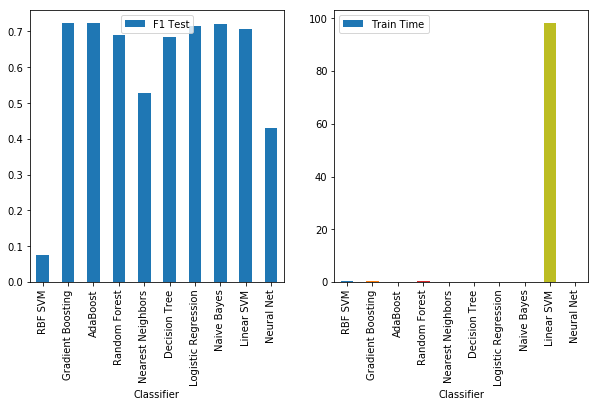

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1])
results.plot(y='Train Time', kind='bar', ax=ax[1])

### Confusion matrix

In [155]:
confusion['Logistic Regression']

array([[543,  96],
       [128, 277]], dtype=int64)

In [156]:
confusion['Gradient Boosting']

array([[618,  21],
       [ 89, 316]], dtype=int64)

### Classification report

In [157]:
print(class_report['Gradient Boosting'])

             precision    recall  f1-score   support

          0       0.87      0.97      0.92       639
          1       0.94      0.78      0.85       405

avg / total       0.90      0.89      0.89      1044



---

---

## Technical summary


I have decided to use RBF as my final model, the reasons being that is was 1. quickly to train, performed very good with the F score

I have decided to use the F1 score to evaluate my model, which basically gives me the mean of the precision and recall  and according to it I have discovered that --- is the best model so far. Using the classification accuracy alone is not sufficient, hence I have used the F1 score. Although there are many ways I could have improved my model like using the **Hyperparameter Tuning** to perform a grid search and investigate which parameters are good for the model and **Cross validation** for splitting our data accurately as opposed to using a train test split which may sometimes be bias on the data we have, especially if it is unbalanced. K fold would have been a great way to split my data and Grid search would have given me the best parameters. 

But I had to consider the machine I was using, if I was working on a GPU cluster,or had the best machine to run my model locally I believe it would have performed very quickly and I would not have considered the training time my model was going to take.

The classification report just shows me the precision, recall and f1 score.
The confusionmattrix allows me to llok at a particular misclasasified values.

# Executive summary

Please note that the summary is being made using **Gradient Boosting** model since it is the best performing model so far relative to all the models we have tested. 

For understanding purposes, I will be using the following variables:

0:No


1:Yes

R20 000 per misclassified cases
R1000 per correctly classified cases

For all predictions we claasified no whereas it was a yes, in total the company will be cost: (618+316)* R1 000 = R934 000.

For all misclassifications: Where a company said yes, whereas it was a no, it cost the company: (21+89)*R20 000 = R2 200 000

So reducing an error will be very important in order to mitigate on the costs incurring by the company for all th misclassifications our model is having